In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import seaborn as sns
df=pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# Basic Info About the dataset

1-
Hours_Studied ----> Number of hours spent studying per week.2-
Attendance ----> Percentage of classes attended3-.
Parental_Involvement ----> Level of parental involvement in the student's education (Low, Medium, High4-).
Access_to_Resources ----> Availability of educational resources (Low, Medium, Hig5-h).
Extracurricular_Activities ----> Participation in extracurricular activities (Yes, 6-No).
Sleep_Hours ----> Average number of hours of sleep per n7-ight.
Previous_Scores ----> Scores from previous 8-exams.
Motivation_Level ----> Student's level of motivation (Low, Medium,9- High).
Internet_Access ----> Availability of internet access (Y10-es, No).
Tutoring_Sessions ----> Number of tutoring sessions attended p11-er month.
Family_Income ----> Family income level (Low, Medi12-um, High).
Teacher_Quality ----> Quality of the teachers (Low, Med13-ium, High).
School_Type ----> Type of school attended (Publi14-c, Private).
Peer_Influence ----> Influence of peers on academic performance (Positive, Neutra15-l, Negative).
Physical_Activity ----> Average number of hours of physical acti16-vity per week.
Learning_Disabilities ----> Presence of learning disabili17-ties (Yes, No).
Parental_Education_Level ----> Highest education level of parents (High School, College18-, Postgraduate).
Distance_from_Home ----> Distance from home to school (Near19-, Moderate, Far).
Gender ----> Gender of the stude20-nt (Male, Female).
Exam_Score ----> Final exam score.

In [5]:
df.shape

(6607, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [9]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


# Data Cleaning

### We can see that max score is > 100. These are potential outliers and we need to remove them.

In [14]:
df = df[df['Exam_Score'] <= 100]

In [16]:
#checking for nul values
df.isnull().sum() 

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [20]:
#checking for duplicate values
df.duplicated().sum()

0

In [22]:
df.shape

(6606, 20)

### We can fill the empty teacher quality values with the average value ,i.e. Medium

In [25]:
# Fill the null values in the 'teacher_quality' column with 'medium'
df['Teacher_Quality']=df['Teacher_Quality'].fillna('Medium')

In [27]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality                0
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

### Since our dataset has 6607 rows out of which at max 90 values are duplicated, we can drop them. This will not affect our data much

In [31]:
df = df.dropna()
df.shape

(6449, 20)

df.isnull().sum()

### We can see that we have eliminated all the null values or replaced them with suitable value. Thus, our data is now cleaned and we can use it for further analysis and to draw suitable conclusions

# EXPLORATORY DATA ANALYSIS

## -Univariate Analysis

### 1) Histogram

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


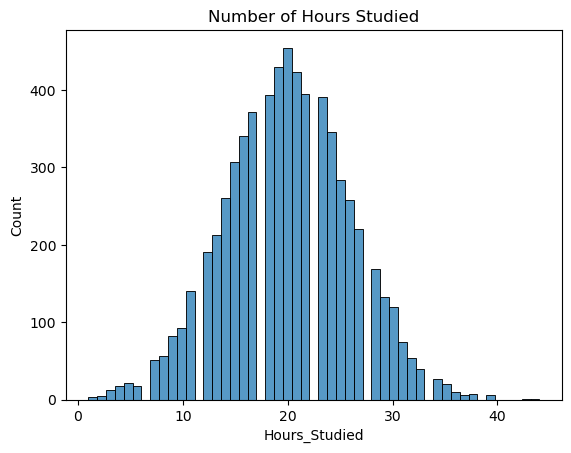

In [40]:
sns.histplot(data = df, x ='Hours_Studied')
plt.title("Number of Hours Studied")
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


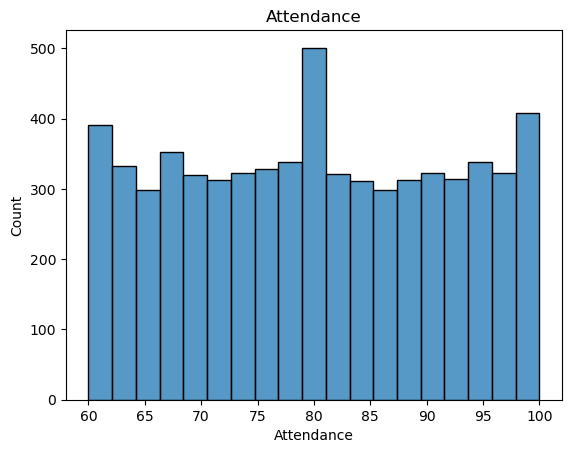

In [42]:
sns.histplot(data = df, x ='Attendance')
plt.title("Attendance")
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


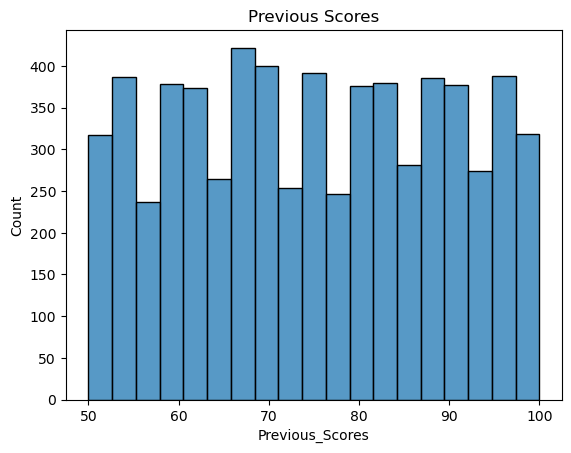

In [44]:
sns.histplot(data = df, x ='Previous_Scores')
plt.title("Previous Scores")
plt.show()

### 2) Pie-Chart

Text(0.5, 1.0, 'Parental Involvement')

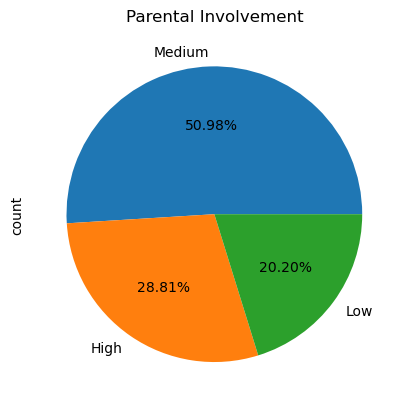

In [47]:
df['Parental_Involvement'].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.title('Parental Involvement')

### 3) Count Plot

Text(0.5, 1.0, 'Sleep Hours per night')

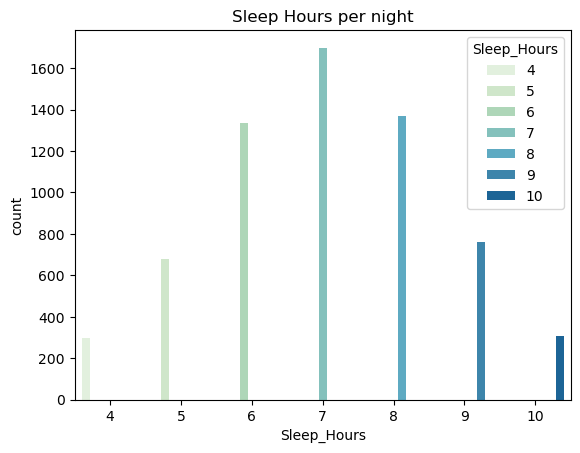

In [50]:
sns.countplot(data=df, x='Sleep_Hours',palette='GnBu',hue='Sleep_Hours')
plt.title("Sleep Hours per night")

Text(0.5, 1.0, 'Access to Resources')

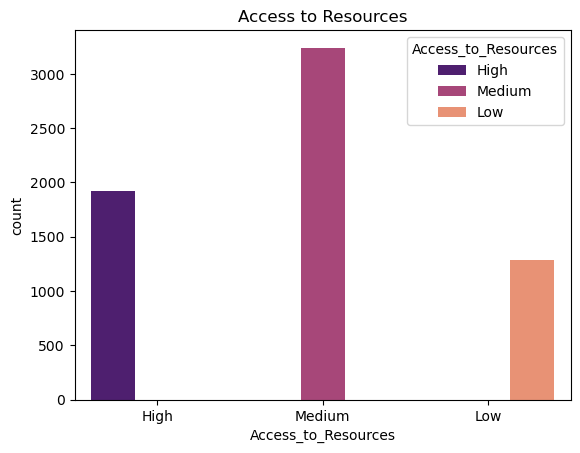

In [52]:
sns.countplot(data=df,x='Access_to_Resources',hue='Access_to_Resources',palette='magma')
plt.title("Access to Resources")

Text(0.5, 1.0, 'Number of Students with Extracurricular Activities')

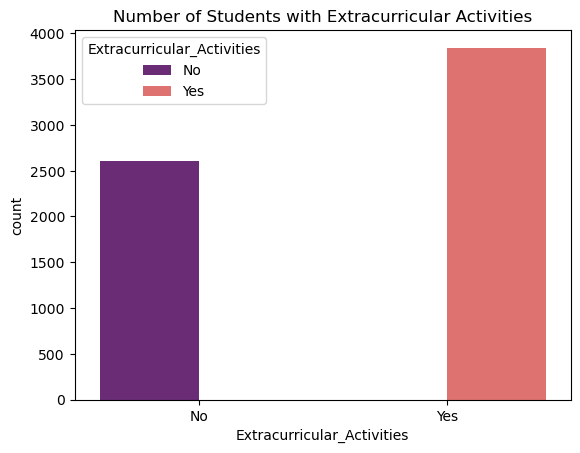

In [54]:
sns.countplot(data=df,x='Extracurricular_Activities',hue='Extracurricular_Activities',palette='magma')
plt.title("Number of Students with Extracurricular Activities")

Text(0.5, 1.0, 'Count of Motivation Level')

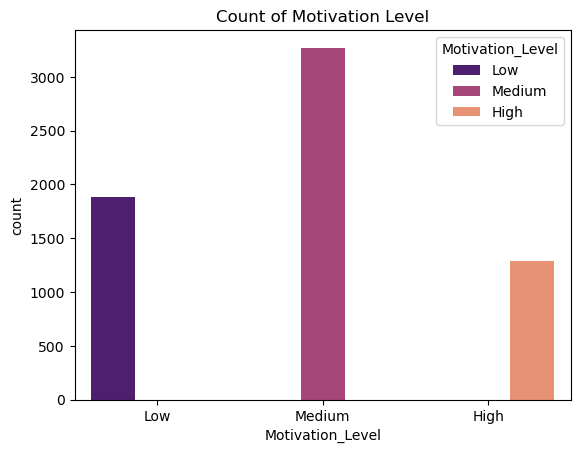

In [56]:
sns.countplot(data=df,x='Motivation_Level',hue='Motivation_Level',palette='magma')
plt.title("Count of Motivation Level")

Text(0.5, 1.0, 'Count of Student with Internet Access')

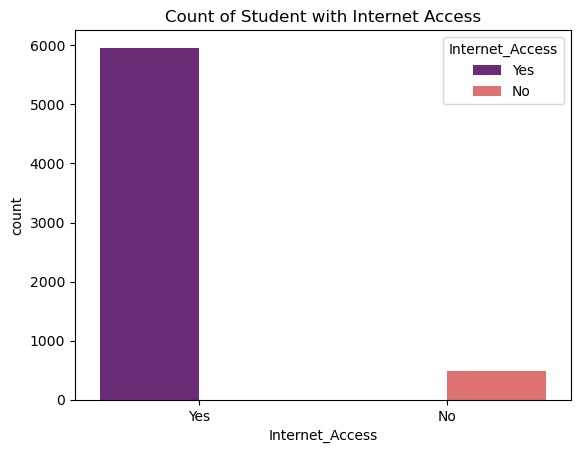

In [58]:
sns.countplot(data=df,x='Internet_Access',hue='Internet_Access',palette='magma') 
plt.title("Count of Student with Internet Access")

Text(0.5, 1.0, 'Distance From Home of Students')

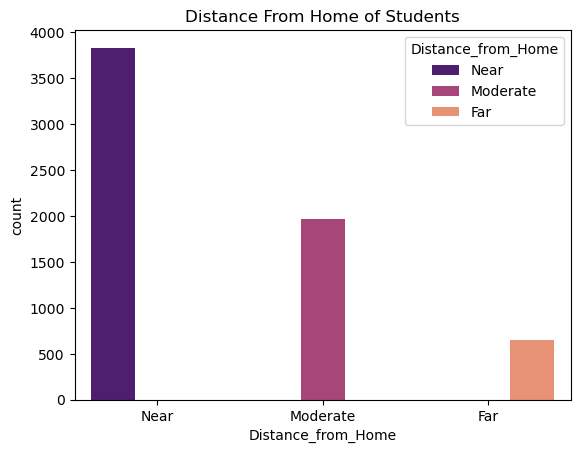

In [60]:
sns.countplot(data=df,x='Distance_from_Home',hue='Distance_from_Home',palette='magma')
plt.title("Distance From Home of Students")

Text(0.5, 1.0, 'Peer Influence on Students')

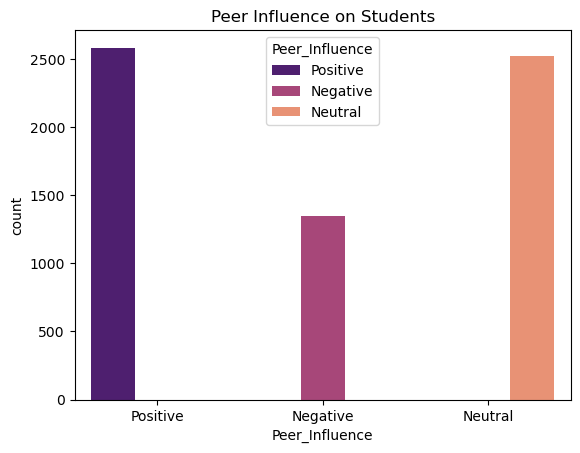

In [62]:
sns.countplot(data=df,x='Peer_Influence',hue='Peer_Influence',palette='magma')
plt.title("Peer Influence on Students")


### Conclusions Of Univariate Analysis

1) More number of students study in the range of 18 to 24 hours a week
2) Most of the students have 80 % attendance
3) Most of the students sleep 7 hours in night
4) Most of the students have medium access to resources
5) Most of the students have medium Motivation level
6) There are a large number of students who participate in extracurricular activities
7) There are a large number of students who have access to internet
8) Most of the students live near the school
9) Most of the students have either positive peer influence or are neutral to it

## Multivariate Analysis

### 1) Scatterplot

Text(0.5, 1.0, 'Plot of Hours Studied vs Exam Score')

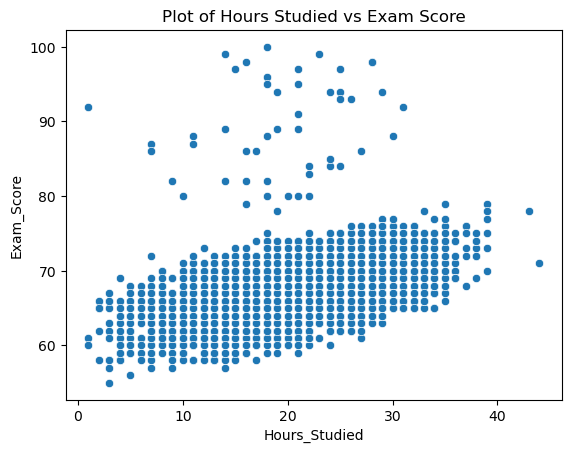

In [68]:
sns.scatterplot(data=df,x='Hours_Studied',y='Exam_Score')
plt.title("Plot of Hours Studied vs Exam Score")

Text(0.5, 1.0, 'Plot of Attendance vs Exam Score')

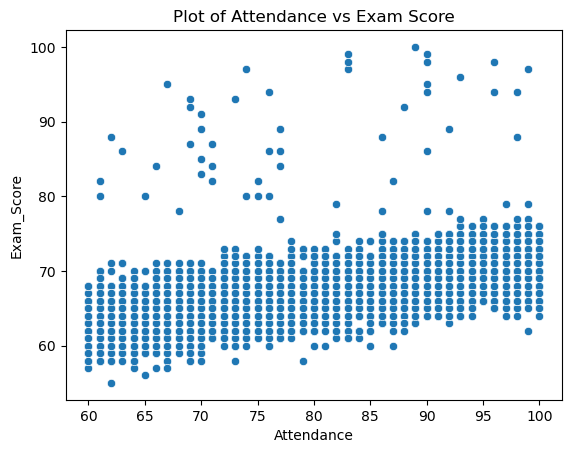

In [70]:
sns.scatterplot(data=df,x='Attendance',y='Exam_Score')
plt.title("Plot of Attendance vs Exam Score")

Text(0.5, 1.0, 'Plot of Physical Activity vs Exam Score')

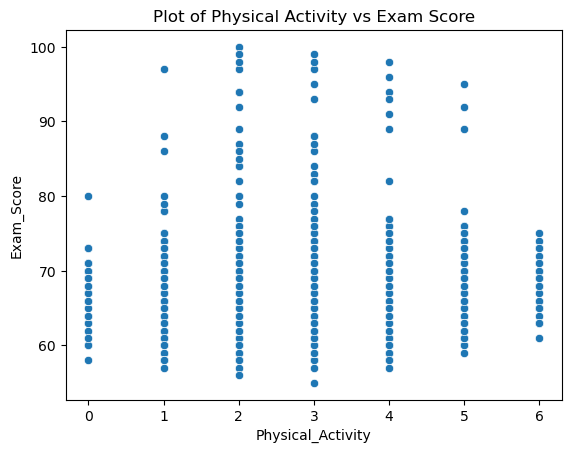

In [72]:
sns.scatterplot(data=df,x='Physical_Activity',y='Exam_Score')
plt.title("Plot of Physical Activity vs Exam Score")

Text(0.5, 1.0, 'Plot of Tutoring Sessions vs Exam Score')

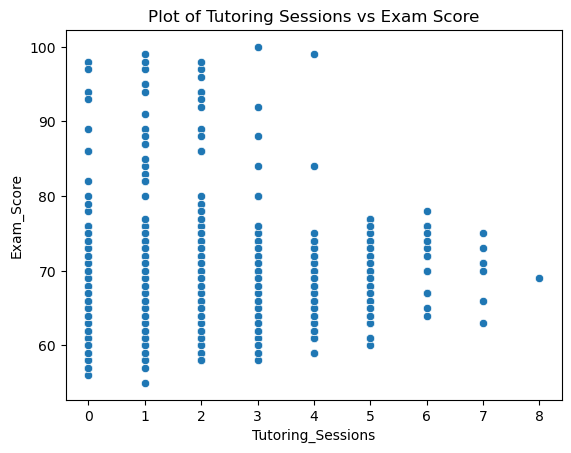

In [74]:
sns.scatterplot(data=df,x='Tutoring_Sessions',y='Exam_Score')
plt.title("Plot of Tutoring Sessions vs Exam Score")

### 2) Box-Plot

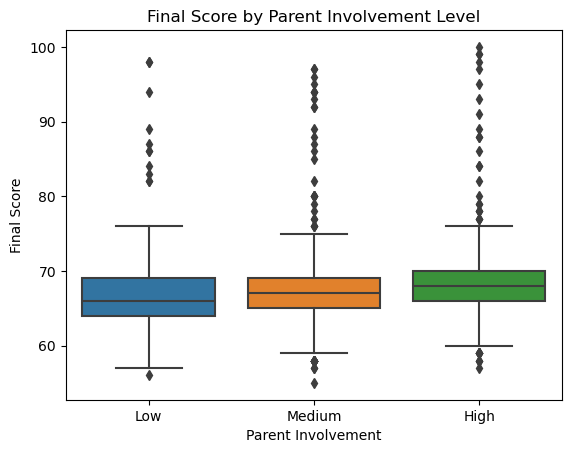

In [77]:
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df)
plt.title('Final Score by Parent Involvement Level')
plt.xlabel('Parent Involvement')
plt.ylabel('Final Score')
plt.show()

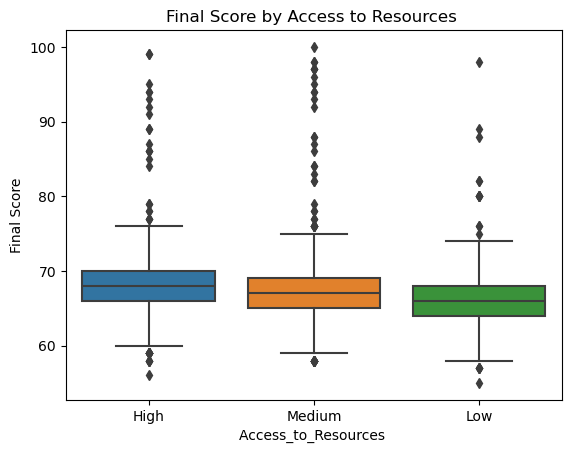

In [79]:
sns.boxplot(x='Access_to_Resources', y='Exam_Score', data=df)
plt.title('Final Score by Access to Resources ')
plt.xlabel('Access_to_Resources ')
plt.ylabel('Final Score')
plt.show()

Text(0.5, 1.0, 'Plot of Extracurricular Activites vs Exam Score')

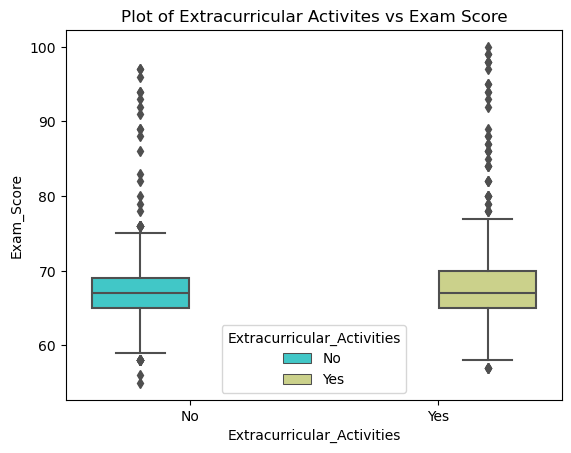

In [81]:
sns.boxplot(x='Extracurricular_Activities',y='Exam_Score',data=df,palette='rainbow',hue='Extracurricular_Activities')
plt.title("Plot of Extracurricular Activites vs Exam Score")

Text(0.5, 1.0, 'Effect of Internet Access on Exam Score')

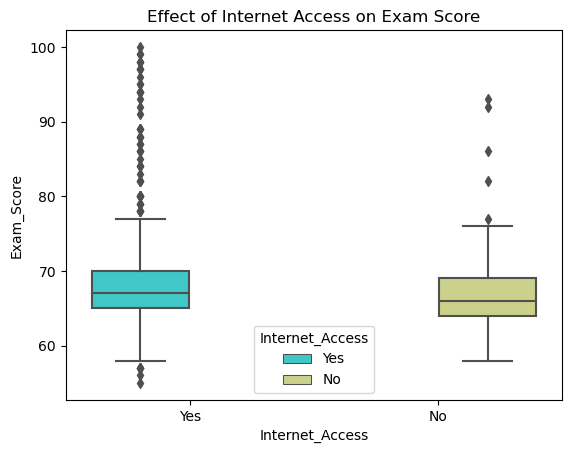

In [87]:
sns.boxplot(x='Internet_Access',y='Exam_Score',data=df,palette='rainbow',hue='Internet_Access')
plt.title("Effect of Internet Access on Exam Score")

Text(0.5, 1.0, 'Effect of Family Income on Exam Score')

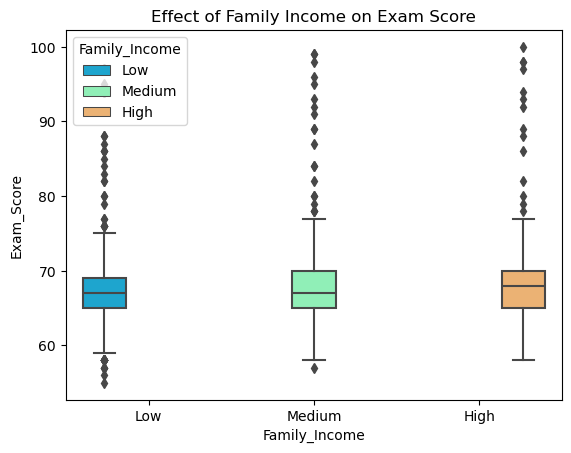

In [85]:
sns.boxplot(x='Family_Income',y='Exam_Score',data=df,palette='rainbow',hue='Family_Income')
plt.title("Effect of Family Income on Exam Score")

Text(0.5, 1.0, 'Effect of Teacher Quality on Exam Score')

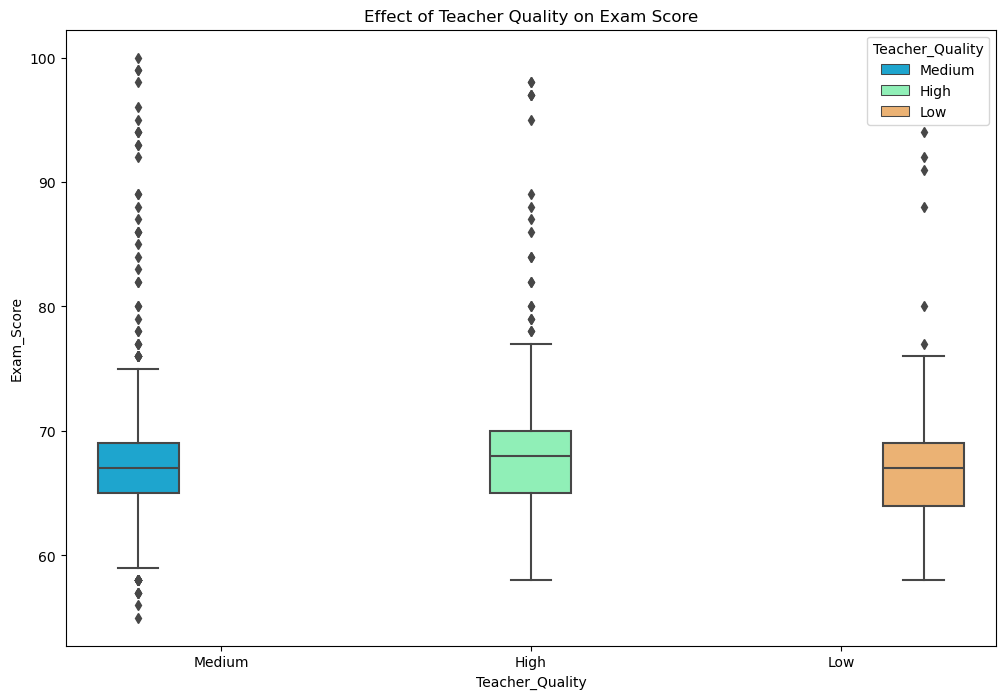

In [83]:
plt.figure(figsize=(12,8)) 
sns.boxplot(x='Teacher_Quality',y='Exam_Score',data=df,palette='rainbow',hue='Teacher_Quality')
plt.title("Effect of Teacher Quality on Exam Score")

Text(0.5, 1.0, 'Effect of School Type on Exam Score')

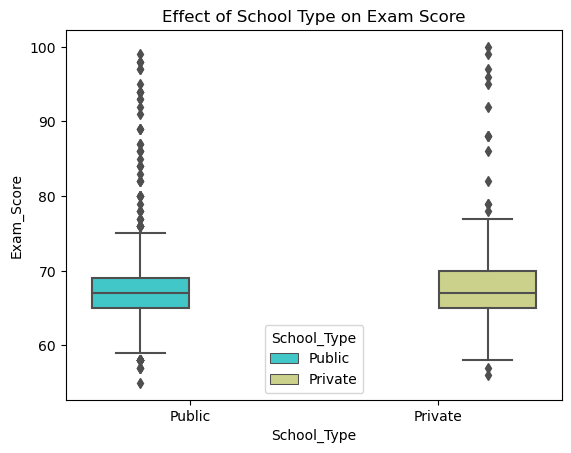

In [89]:
sns.boxplot(x='School_Type',y='Exam_Score',data=df,palette='rainbow',hue='School_Type')
plt.title("Effect of School Type on Exam Score")

Text(0.5, 1.0, 'Peer Influence on Exam Score')

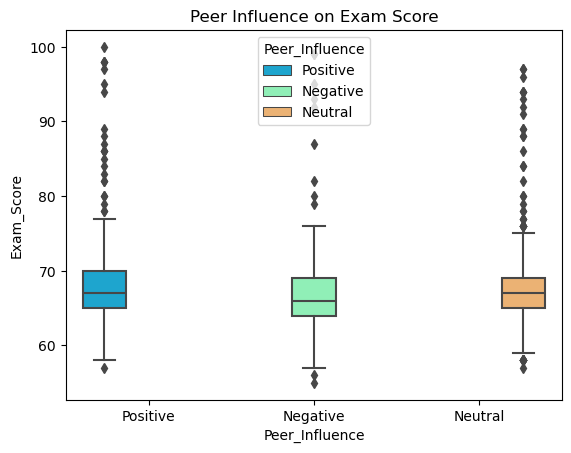

In [91]:
sns.boxplot(x='Peer_Influence',y='Exam_Score',data=df,palette='rainbow',hue='Peer_Influence')
plt.title("Peer Influence on Exam Score")

Text(0.5, 1.0, 'Effect of Distance From Home on Exam Score')

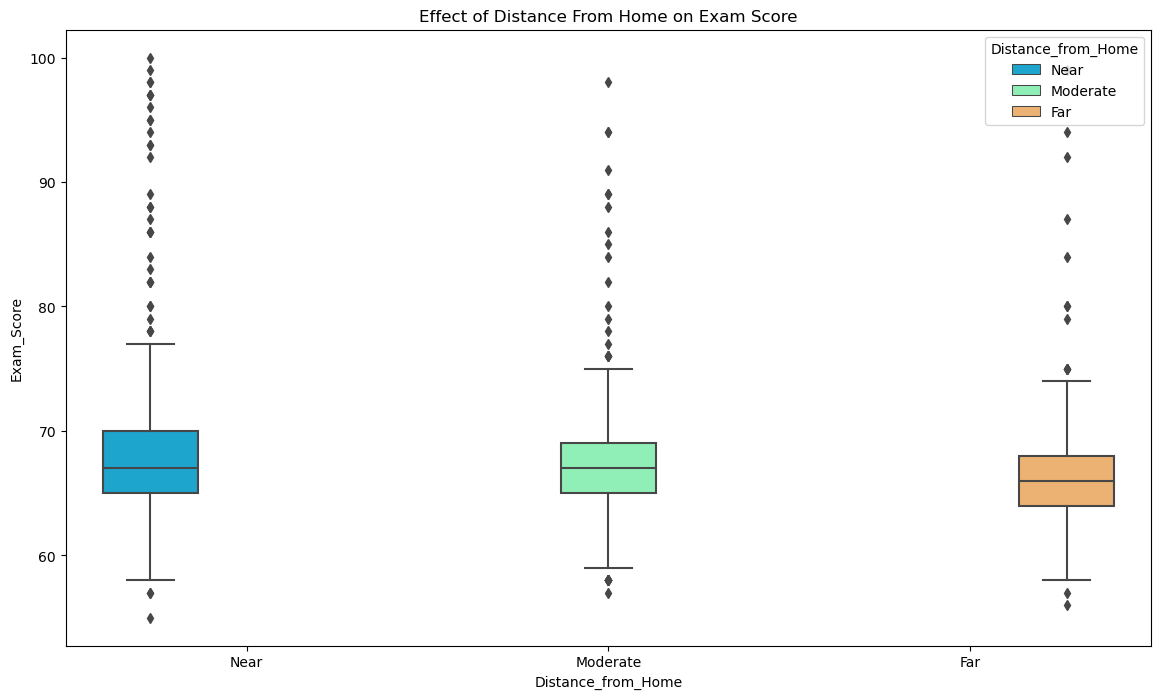

In [93]:
plt.figure(figsize=(14,8)) 
sns.boxplot(x='Distance_from_Home',y='Exam_Score',data=df,palette='rainbow',hue='Distance_from_Home')
plt.title("Effect of Distance From Home on Exam Score")

Text(0.5, 1.0, 'Effect of Gender on Exam Score')

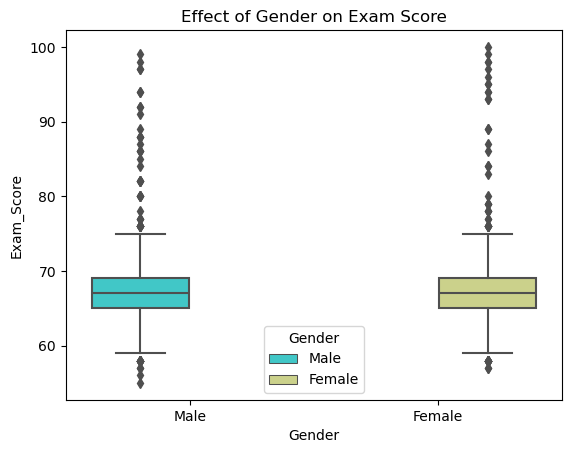

In [95]:
sns.boxplot(x='Gender',y='Exam_Score',data=df,palette='rainbow',hue='Gender')
plt.title("Effect of Gender on Exam Score")

### 3) Heat Map

Text(0.5, 1.0, 'Heat-map of Family Income vs School Type')

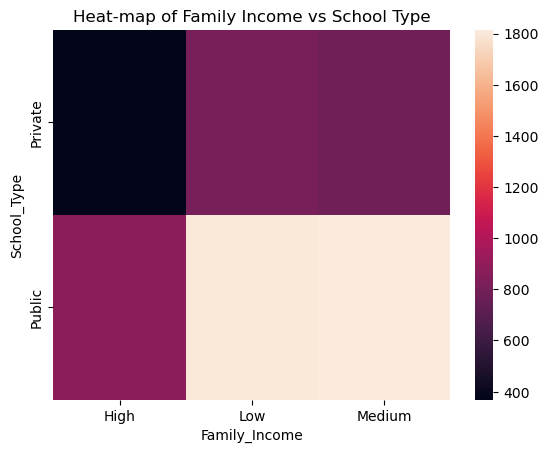

In [98]:
sns.heatmap(pd.crosstab(df['School_Type'],df['Family_Income']))
plt.title("Heat-map of Family Income vs School Type")

Text(0.5, 1.0, 'Heat-map of Motivation Level vs Peer Influence')

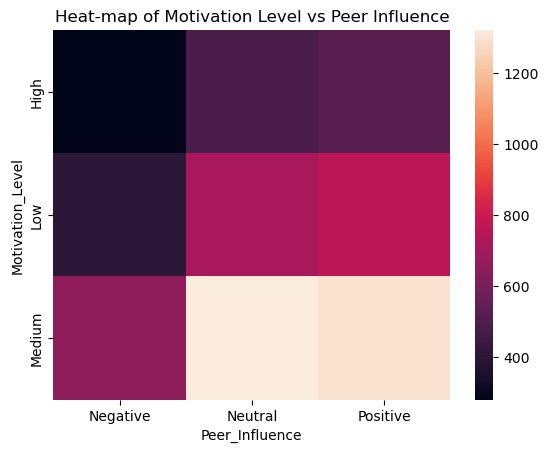

In [100]:
sns.heatmap(pd.crosstab(df['Motivation_Level'],df['Peer_Influence']))
plt.title("Heat-map of Motivation Level vs Peer Influence")

Text(0.5, 1.0, 'Heat-map of Extracurricular Activities vs Motivation Level')

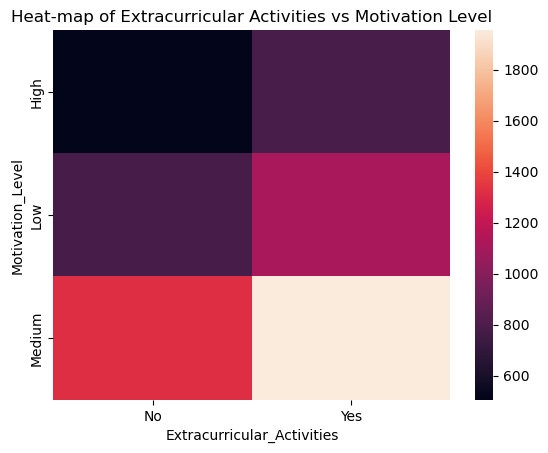

In [102]:
sns.heatmap(pd.crosstab(df['Motivation_Level'],df['Extracurricular_Activities']))
plt.title("Heat-map of Extracurricular Activities vs Motivation Level")

Text(0.5, 1.0, 'Heat-map of Parental Involvement vs Family Income')

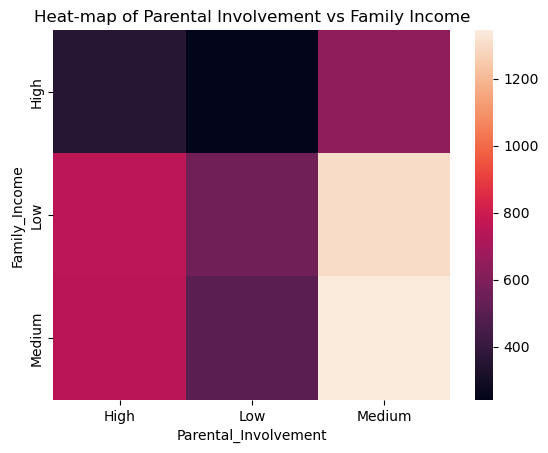

In [104]:
sns.heatmap(pd.crosstab(df['Family_Income'],df['Parental_Involvement']))
plt.title("Heat-map of Parental Involvement vs Family Income")

### Conclusions of Bi-variate Analysis

1) Most of the students who scored greater than 75 marks out of 100 studied 15 to 30 hours a week
2) Students with attendance greater than 80% scored better than rest of the class
3) Students who scored more than 80 marks had 2 to 4 hours of physical activity per week
4) Most students attended 0 to 2 tutoring sessions a month and scored greater than 75 %
5) Students with high and medium parental involvement scored better than students who had low parental involvement
6) Students with medium access to resources scored better
7) Students who had some extracurricular activities scored better
8) Most of the students who scored high marks had internet access though some of them scored very low than students with no internet access
9) Students with medium family income scored at par with those who had high family income
10) Public School students are more in number and scored good marks than private ones
11) Some of the male students scored very less
12) Students with medium family income and public school type are large in number
13) A large number of students who participated in extra-curricular activities showed medium motivation level
14) A significant number of students who had low family income had low parent involvement

## Statistical Tests

### - Correlation Analysis

#### 1: Hours Studied and Exam Score

In [110]:
corr, p_value = pearsonr(df['Hours_Studied'], df['Exam_Score'])
print(f'Pearson correlation: {corr}, P-value: {p_value}')

Pearson correlation: 0.4453222822702003, P-value: 8.12387862608e-312


#### Conclusion

1) There is a moderate positive correlation between Hours_Studied and Exam_Score (r = 0.4455).
2) 
The relationship is statistically significant (p-value ≈ 0), meaning the correlation is not due to random chance.

#### 2: Attendance and Exam Score

In [114]:
corr_a, p_value_a = pearsonr(df['Attendance'], df['Exam_Score'])
print(f'Pearson correlation: {corr_a}, P-value: {p_value_a}')

Pearson correlation: 0.5819174117898713, P-value: 0.0


#### Conclusion

1) There is a positive correlation between Attendance and Exam_Score (r = 0.5810).
2) The relationship is statistically significant (p-value = 0), meaning the correlation is not due to random chance.

### - ANOVA

#### 1 : Parental Involvment and Exam Score

In [119]:
# Group exam scores by parental involvement level
low = df[df['Parental_Involvement'] == 'Low']['Exam_Score']
medium = df[df['Parental_Involvement'] == 'Medium']['Exam_Score']
high = df[df['Parental_Involvement'] == 'High']['Exam_Score']

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(low, medium, high)
print(f'F-statistic: {f_statistic}, P-value: {p_value}')

F-statistic: 84.91145088368451, P-value: 3.988632967353877e-37


#### Conclusion

1) F-statistic of 84.91 is quite large, indicating that there are substantial differences in exam scores across the different levels of parental involvement.
2) Since the p-value is so low, you can reject the null hypothesis, which states that the mean exam scores are the same across all levels of parental involvement.
3) This means that parental involvement does have a significant impact on exam scores—at least one group's mean exam score is significantly different from the others.

#### 2: Access to Resources and Exam Score

In [123]:
# Group exam scores by Access_to_Resources
low_ = df[df['Access_to_Resources'] == 'Low']['Exam_Score']
medium_ = df[df['Access_to_Resources'] == 'Medium']['Exam_Score']
high_ = df[df['Access_to_Resources'] == 'High']['Exam_Score']

# Perform one-way ANOVA
f_statistic_, p_value_ = stats.f_oneway(low_, medium_, high_)
print(f'F-statistic: {f_statistic_}, P-value: {p_value_}')

F-statistic: 95.86500005172576, P-value: 9.408604555443292e-42


#### Conclusion

1) F-statistic of 95.86 is very large, indicating that there are substantial differences in exam scores across the different levels of Access to Resources.2) 
Since the p-value is so low, you can reject the null hypothesis, which states that the mean exam scores are the same across all levels of Access to Resources.3) 
This means that Access to Resources does have a significant impact on exam scores—at least one group's mean exam score is significantly different from the others.

### -T-Test

#### 1 : Gender and Exam Score

In [128]:
# Group exam scores by Gender
female = df[df['Gender'] == 'Female']['Exam_Score']
male = df[df['Gender'] == 'Male']['Exam_Score']

# Perform independent t-test
t_statistic_, p_value_ = ttest_ind(female,male )
print(f'T-statistic: {t_statistic_}, P-value: {p_value_}')

T-statistic: 0.2745245097407863, P-value: 0.7836903667979294


#### Conclusion

1) the t-statistic of 0.2745 suggests that there is very little difference in exam scores between males and females.
2) Since the p-value is greater than 0.05, you fail to reject the null hypothesis, which means there is no significant difference in exam scores between males and females in your dataset.
3) In other words, gender does not seem to have a statistically significant impact on exam scores based on this test.

### - Chi-Square test

#### 1- Extracurricular Actvities and Motivation Level

In [133]:
contingency_table = pd.crosstab(df['Extracurricular_Activities'], df['Motivation_Level'])

# Perform the Chi-Square test for categorical and categorical data
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the result
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 1.5349373914022524
P-Value: 0.4641865799123531
Degrees of Freedom: 2
Expected Frequencies:
[[ 520.88075671  761.93952551 1321.17971779]
 [ 769.11924329 1125.06047449 1950.82028221]]


#### Conclusion

Since the p-value is higher than the typical threshold of 0.05, we fail to reject the null hypothesis. This suggests that there is no statistically significant association between Extracurricular_Activities and Motivation_Level. In other words, the data does not provide strong evidence that involvement in extracurricular activities is related to motivation level.